In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('D:\\AI---Personalized-Workout-Nutrition-Coach\\data\\raw_data\\workouts.csv')
df.head()

,id,name,duration_min,intensity,muscle_group,age,gender,goal,bmi,fitness_level
0,1,Push Ups,10,Medium,Chest,25,Male,Build Muscle,24.5,Intermediate
1,2,Squats,15,High,Legs,30,Female,Weight Loss,22.1,Beginner
2,3,Plank,5,Low,Core,28,Male,Toning,23.4,Beginner
3,4,Burpees,12,High,Full Body,35,Female,Endurance,27.8,Intermediate
4,5,Lunges,10,Medium,Legs,22,Male,Build Muscle,21.9,Beginner


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   name           100 non-null    object 
 2   duration_min   100 non-null    int64  
 3   intensity      100 non-null    object 
 4   muscle_group   100 non-null    object 
 5   age            100 non-null    int64  
 6   gender         100 non-null    object 
 7   goal           100 non-null    object 
 8   bmi            100 non-null    float64
 9   fitness_level  100 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

id               0
name             0
duration_min     0
intensity        0
muscle_group     0
age              0
gender           0
goal             0
bmi              0
fitness_level    0
dtype: int64

## EDA

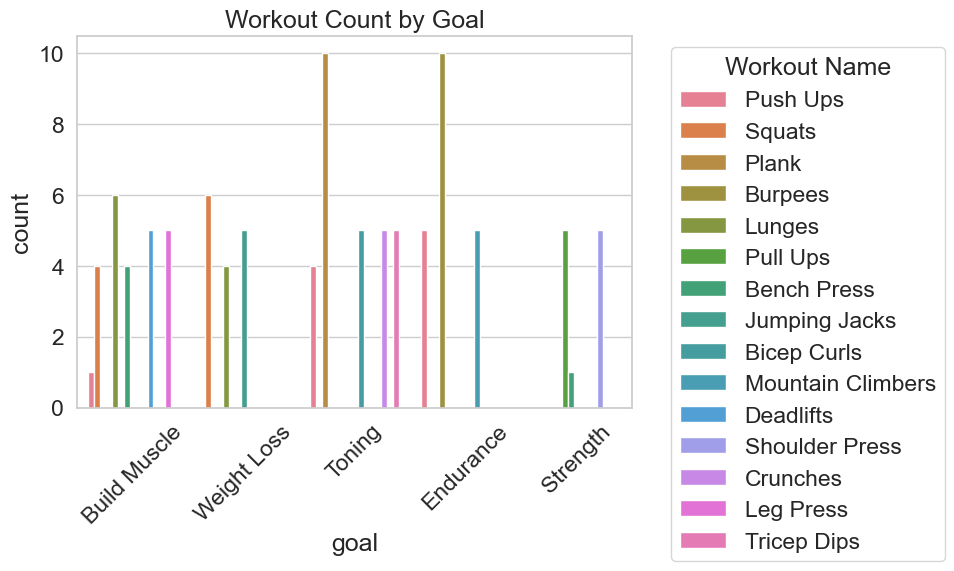

In [11]:
## Distribution Plots
sns.set(style="whitegrid",palette="muted",font_scale=1.5)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="goal", hue="name")
plt.title("Workout Count by Goal")
plt.xticks(rotation=45)
plt.legend(title="Workout Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

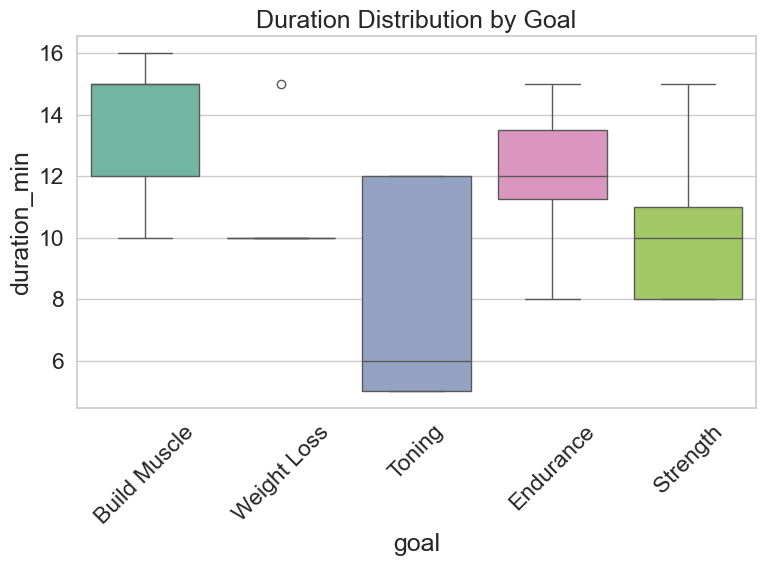

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="goal", y="duration_min", palette="Set2", hue="goal", legend=False)
plt.title("Duration Distribution by Goal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

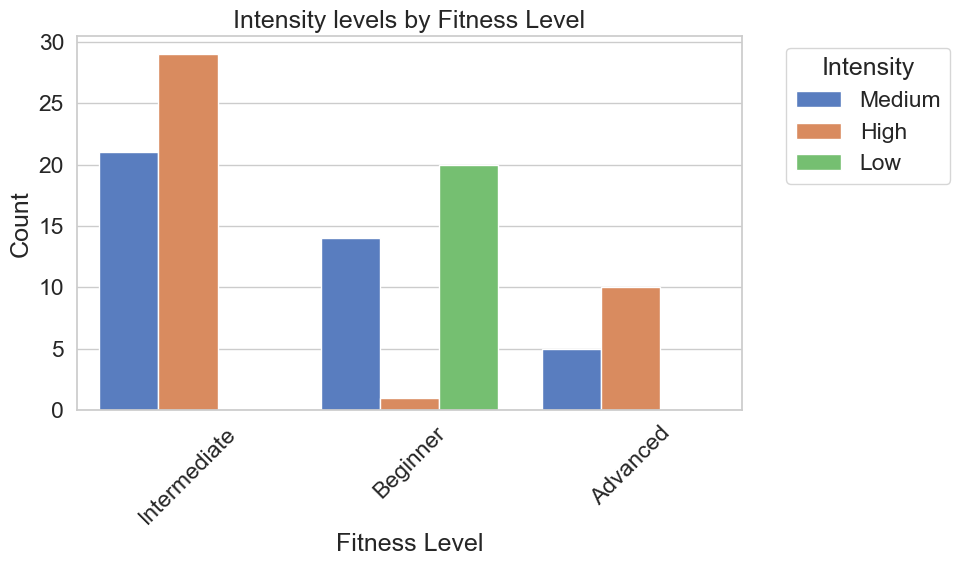

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="fitness_level", hue="intensity")
plt.title("Intensity levels by Fitness Level")
plt.xlabel("Fitness Level")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title="Intensity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

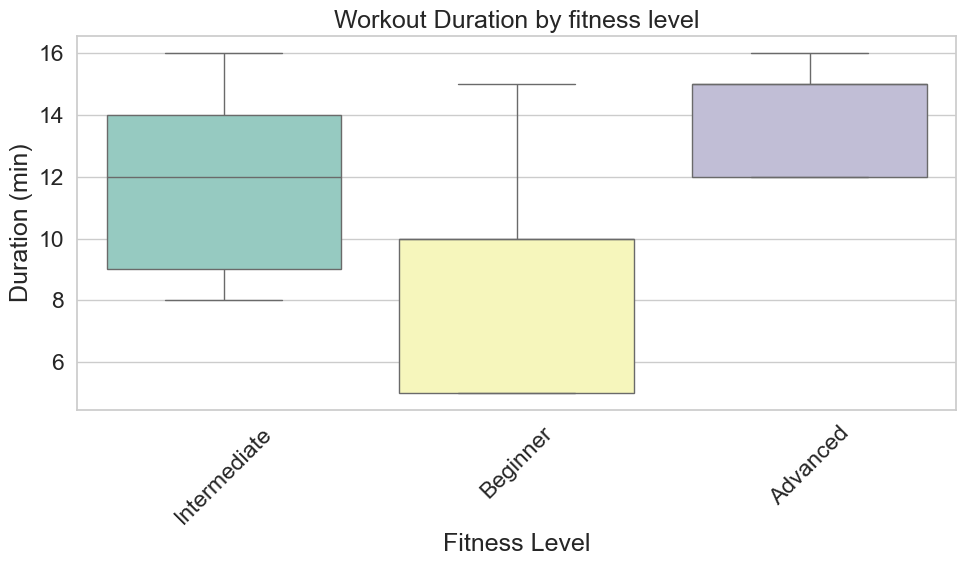

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="fitness_level", y="duration_min", hue="fitness_level", palette="Set3")
plt.title("Workout Duration by fitness level")
plt.xlabel("Fitness Level")
plt.ylabel("Duration (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

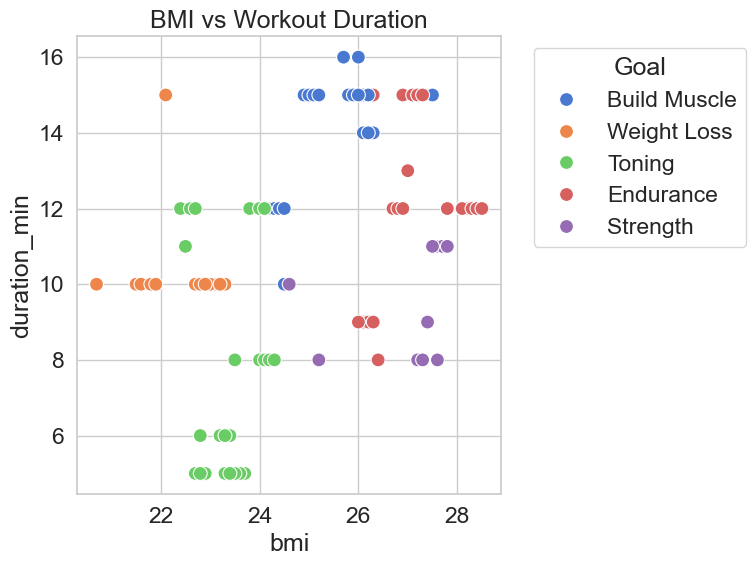

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="bmi", y="duration_min", hue="goal", s=100)
plt.title("BMI vs Workout Duration")
plt.legend(title="Goal", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

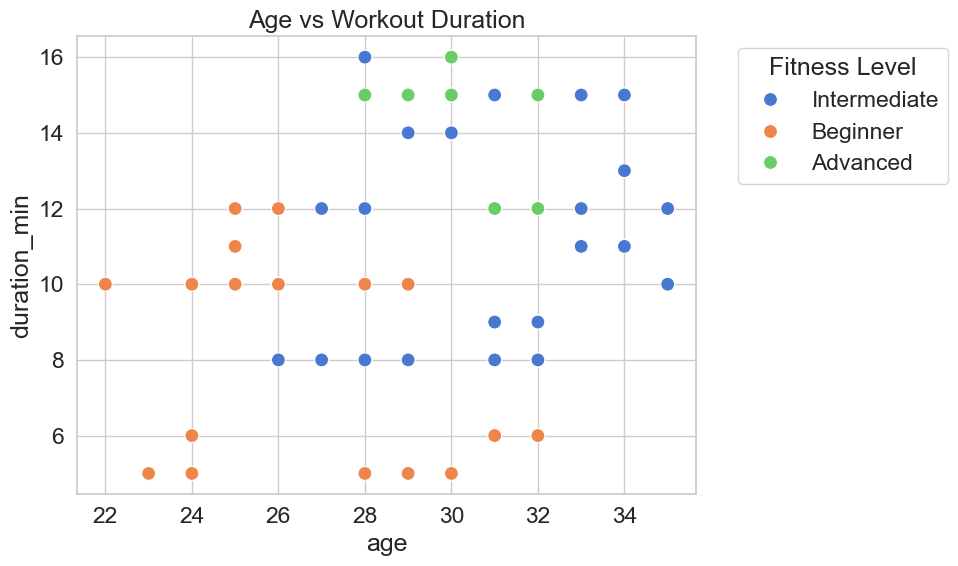

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="duration_min", hue="fitness_level", s=100)
plt.title("Age vs Workout Duration")
plt.legend(title="Fitness Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [25]:
df=df.drop(columns=['id'], axis=1)

In [26]:
df.head()

,name,duration_min,intensity,muscle_group,age,gender,goal,bmi,fitness_level
0,Push Ups,10,Medium,Chest,25,Male,Build Muscle,24.5,Intermediate
1,Squats,15,High,Legs,30,Female,Weight Loss,22.1,Beginner
2,Plank,5,Low,Core,28,Male,Toning,23.4,Beginner
3,Burpees,12,High,Full Body,35,Female,Endurance,27.8,Intermediate
4,Lunges,10,Medium,Legs,22,Male,Build Muscle,21.9,Beginner


## Preprocessing and Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, classification_report

In [28]:
X=df[['intensity','muscle_group','age','gender','goal','bmi','fitness_level']] # dependent variables
# Targets
y_workout_name=df['name'] #classification target
y_duration_time=df['duration_min'] # regression target

In [29]:
categorical_features = [feat for feat in X.select_dtypes(include=['object']).columns]
numerical_features = [feat for feat in X.select_dtypes(include=['int64', 'float64']).columns]
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['intensity', 'muscle_group', 'gender', 'goal', 'fitness_level']
Numerical Features: ['age', 'bmi']


In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ]
)

In [31]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['intensity', 'muscle_group', 'gender', 'goal',
                                  'fitness_level']),
                                ('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi'])])

In [33]:
X_train, X_test , y_workout_train, y_workout_test= train_test_split(X,y_workout_name, test_size=0.2, random_state=42)
_,_ , y_duration_train, y_duration_test= train_test_split(X,y_duration_time ,test_size=0.2, random_state=42)

In [34]:
## Pipeline
workout_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
duration_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [35]:
workout_pipeline.fit(X_train, y_workout_train)
duration_pipeline.fit(X_train, y_duration_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['intensity', 'muscle_group',
                                                   'gender', 'goal',
                                                   'fitness_level']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [36]:
y_workout_pred = workout_pipeline.predict(X_test)
print(classification_report(y_workout_test, y_workout_pred))

                   precision    recall  f1-score   support

          Burpees       1.00      0.50      0.67         2
         Crunches       1.00      1.00      1.00         1
        Deadlifts       1.00      1.00      1.00         4
        Leg Press       1.00      0.33      0.50         3
           Lunges       1.00      0.67      0.80         3
Mountain Climbers       0.00      0.00      0.00         0
            Plank       1.00      1.00      1.00         2
         Pull Ups       1.00      1.00      1.00         1
         Push Ups       1.00      1.00      1.00         2
   Shoulder Press       1.00      1.00      1.00         1
           Squats       0.25      1.00      0.40         1

         accuracy                           0.80        20
        macro avg       0.84      0.77      0.76        20
     weighted avg       0.96      0.80      0.83        20



d:\AI---Personalized-Workout-Nutrition-Coach\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI---Personalized-Workout-Nutrition-Coach\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\AI---Personalized-Workout-Nutrition-Coach\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
y_duration_pred = duration_pipeline.predict(X_test)
mae = mean_absolute_error(y_duration_test, y_duration_pred)
print(f"Mean Absolute Error for Duration Prediction: {mae:.2f} %")

Mean Absolute Error for Duration Prediction: 0.89 %


In [42]:
# inference example
sample_data = pd.DataFrame([{
    'intensity': 'medium',
    'muscle_group': 'Full Body',
    'age': 30,
    'gender': 'Female',
    'goal': 'Toning',
    'bmi': 26,
    'fitness_level': 'Beginner'
}])

workout_pred = workout_pipeline.predict(sample_data)[0]
duration_pred = duration_pipeline.predict(sample_data)[0]

In [43]:
print("Predicted Workout:", workout_pred)
print("Predicted Duration (min):", duration_pred)

Predicted Workout: Mountain Climbers
Predicted Duration (min): 10.518571428571429


In [49]:
import joblib
class WorkoutModel:
    def __init__(self, workout_model, duration_model):
        self.workout_model = workout_model
        self.duration_model = duration_model

    def predict(self, user_data):
        workout = self.workout_model.predict(user_data)
        duration = self.duration_model.predict(user_data)
        results = []
        for i in range(len(user_data)):
            results.append({
                "workout": workout[i],
                "duration": duration[i]
            })
        return results
    
    def save(self, filepath):
        joblib.dump(self, filepath)
        
    @classmethod
    def load(cls, filepath):
        return joblib.load(filepath)

In [50]:
combined_model = WorkoutModel(workout_pipeline, duration_pipeline)
combined_model.save('workout_model.pkl')
print("Model saved as 'workout_model.pkl'")

Model saved as 'workout_model.pkl'


In [51]:
# inference example
sample_data = pd.DataFrame([{
    'intensity': 'medium',
    'muscle_group': 'Full Body',
    'age': 30,
    'gender': 'Female',
    'goal': 'Toning',
    'bmi': 26,
    'fitness_level': 'Beginner'
}])
pred=combined_model.predict(sample_data)
print(pred)

[{'workout': 'Mountain Climbers', 'duration': 10.518571428571429}]
